<a href="https://colab.research.google.com/github/kalyani234/ann_cw/blob/main/kepler_cw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
planet_dataset_path = '/content/drive/MyDrive/ANN_Planet_dataset/planets.csv'

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [10]:
# Load the dataset
planets_df = pd.read_csv(planet_dataset_path)

In [11]:
# Check the DataFrame columns
print(planets_df.columns)

Index(['rowid', 'pl_hostname', 'pl_letter', 'pl_discmethod', 'pl_pnum',
       'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim',
       'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
       'pl_orbeccen', 'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_orbincl', 'pl_orbinclerr1', 'pl_orbinclerr2', 'pl_orbincllim',
       'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2', 'pl_bmassjlim',
       'pl_bmassprov', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim',
       'pl_dens', 'pl_denserr1', 'pl_denserr2', 'pl_denslim', 'pl_ttvflag',
       'pl_kepflag', 'pl_k2flag', 'pl_nnotes', 'ra_str', 'ra', 'dec_str',
       'dec', 'st_dist', 'st_disterr1', 'st_disterr2', 'st_distlim',
       'st_optmag', 'st_optmagerr', 'st_optmaglim', 'st_optmagblend',
       'st_optband', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim',
       'st_teffblend', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim',
       'st_massblend', 'st_rad', 'st_rade

In [12]:
# Check the first few rows of the planet DataFrame
planets_df.head()

,rowid,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,st_masserr1,st_masserr2,st_masslim,st_massblend,st_rad,st_raderr1,st_raderr2,st_radlim,st_radblend,rowupdate
0,1,11 Com,b,Radial Velocity,1,326.03,0.32,-0.32,0.0,1.290,...,0.30,-0.30,0.0,0.0,19.00,2.00,-2.00,0.0,0.0,2014-05-14
1,2,11 UMi,b,Radial Velocity,1,516.22,3.25,-3.25,0.0,1.540,...,0.25,-0.25,0.0,0.0,24.08,1.84,-1.84,0.0,0.0,2014-05-14
2,3,14 And,b,Radial Velocity,1,185.84,0.23,-0.23,0.0,0.830,...,0.10,-0.20,0.0,0.0,11.00,1.00,-1.00,0.0,0.0,2014-05-14
3,4,14 Her,b,Radial Velocity,1,1773.40,2.50,-2.50,0.0,2.770,...,0.05,-0.05,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2014-05-14
4,5,16 Cyg B,b,Radial Velocity,1,798.50,1.00,-1.00,0.0,1.681,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2015-09-10


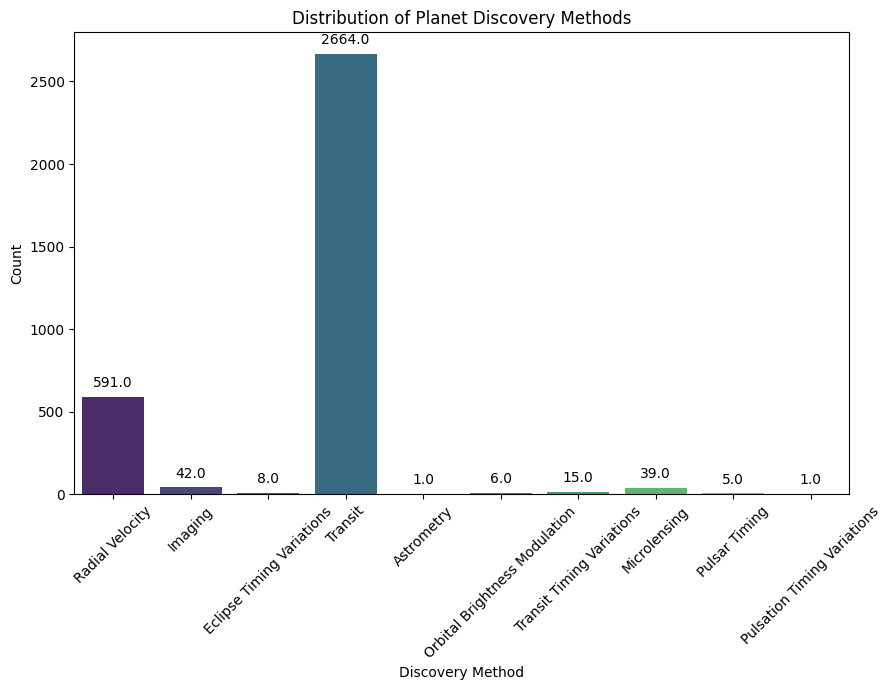

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=planets_df, x='pl_discmethod', hue='pl_discmethod', palette='viridis', legend=False)
plt.title('Distribution of Planet Discovery Methods')
plt.xlabel('Discovery Method')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x labels if they are too long

# Optional: Add value annotations
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


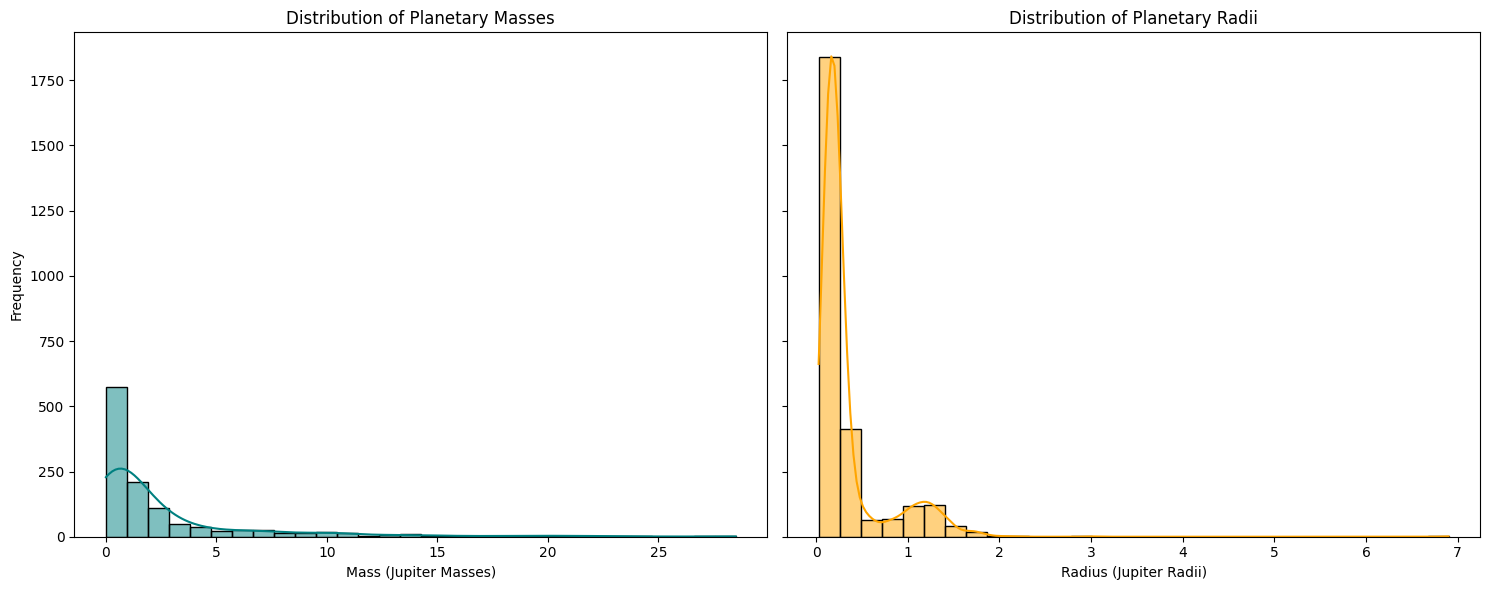

In [14]:
# Plot the distribution of planetary mass and planetry radii
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot the distribution of planetary mass
sns.histplot(planets_df['pl_bmassj'].dropna(), bins=30, kde=True, color='teal', ax=axs[0])
axs[0].set_title('Distribution of Planetary Masses')
axs[0].set_xlabel('Mass (Jupiter Masses)')
axs[0].set_ylabel('Frequency')

# Plot the distribution of planetary radius
sns.histplot(planets_df['pl_radj'].dropna(), bins=30, kde=True, color='orange', ax=axs[1])
axs[1].set_title('Distribution of Planetary Radii')
axs[1].set_xlabel('Radius (Jupiter Radii)')

# Adjust layout
plt.tight_layout()
plt.show()

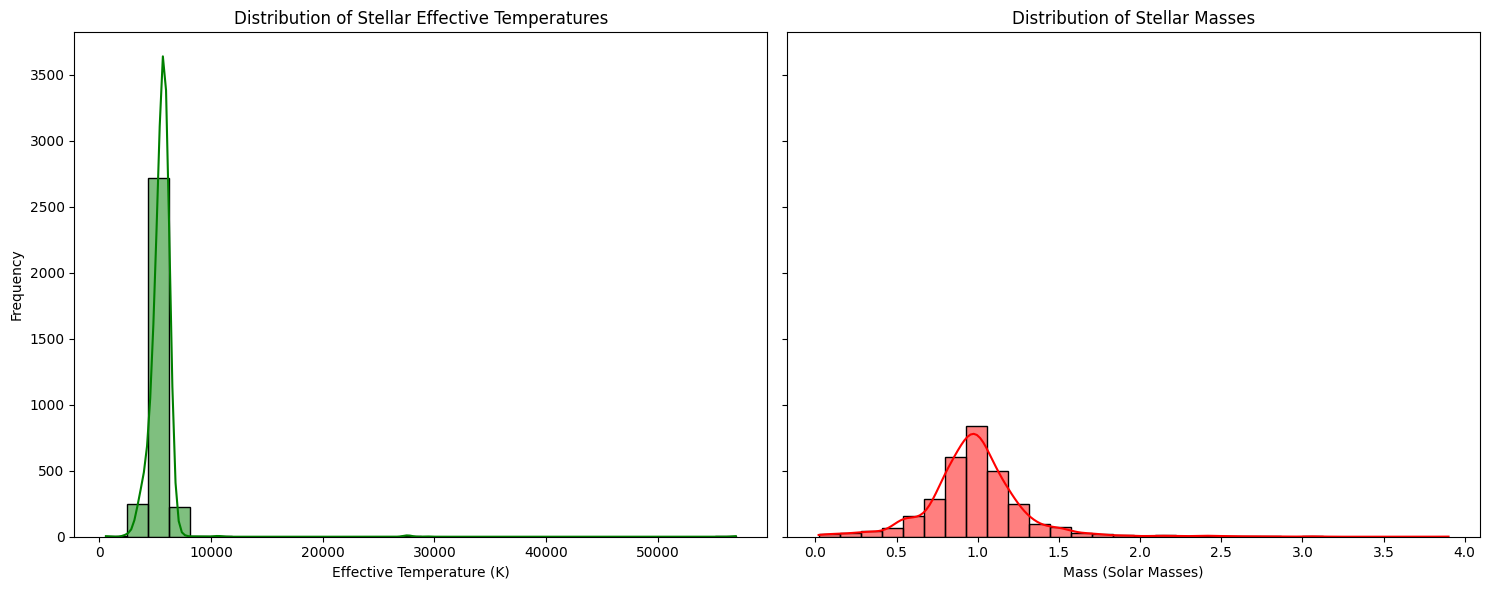

In [15]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot the distribution of stellar temperature
sns.histplot(planets_df['st_teff'].dropna(), bins=30, kde=True, color='green', ax=axs[0])
axs[0].set_title('Distribution of Stellar Effective Temperatures')
axs[0].set_xlabel('Effective Temperature (K)')
axs[0].set_ylabel('Frequency')

# Plot the distribution of stellar mass
sns.histplot(planets_df['st_mass'].dropna(), bins=30, kde=True, color='red', ax=axs[1])
axs[1].set_title('Distribution of Stellar Masses')
axs[1].set_xlabel('Mass (Solar Masses)')

# Adjust layout
plt.tight_layout()
plt.show()

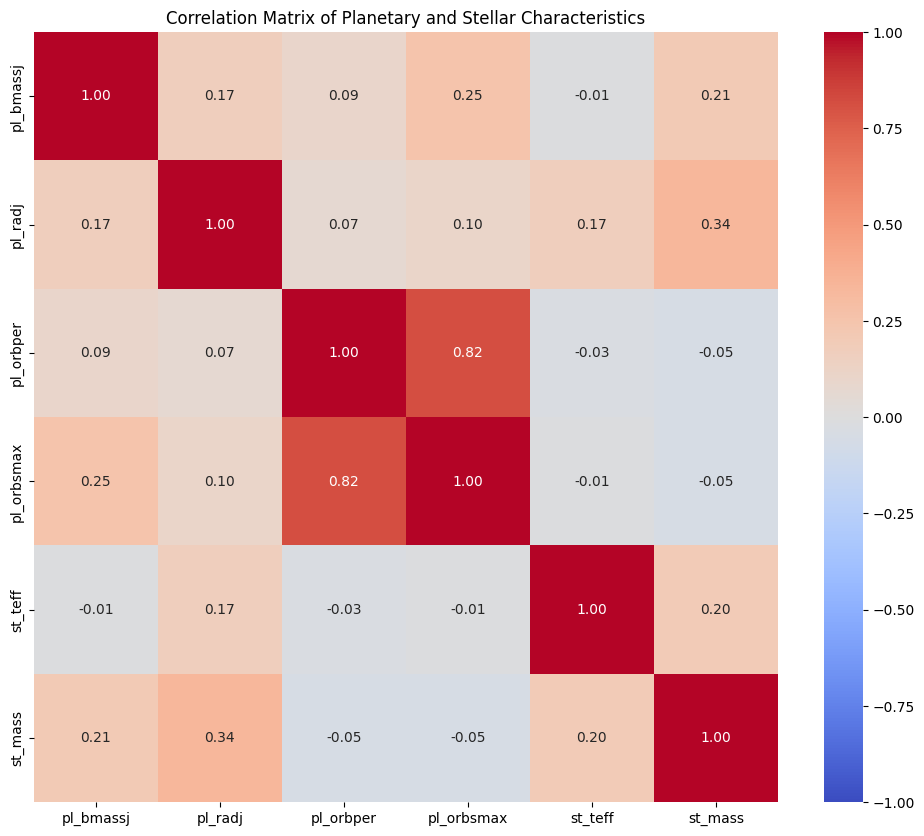

In [16]:
# correlation matrix of planet dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the planet df correlation matrix
correlation_matrix = planets_df[['pl_bmassj', 'pl_radj', 'pl_orbper', 'pl_orbsmax', 'st_teff', 'st_mass']].corr()

# Create a heatmap to visualize the planet_df correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Planetary and Stellar Characteristics')
plt.show()


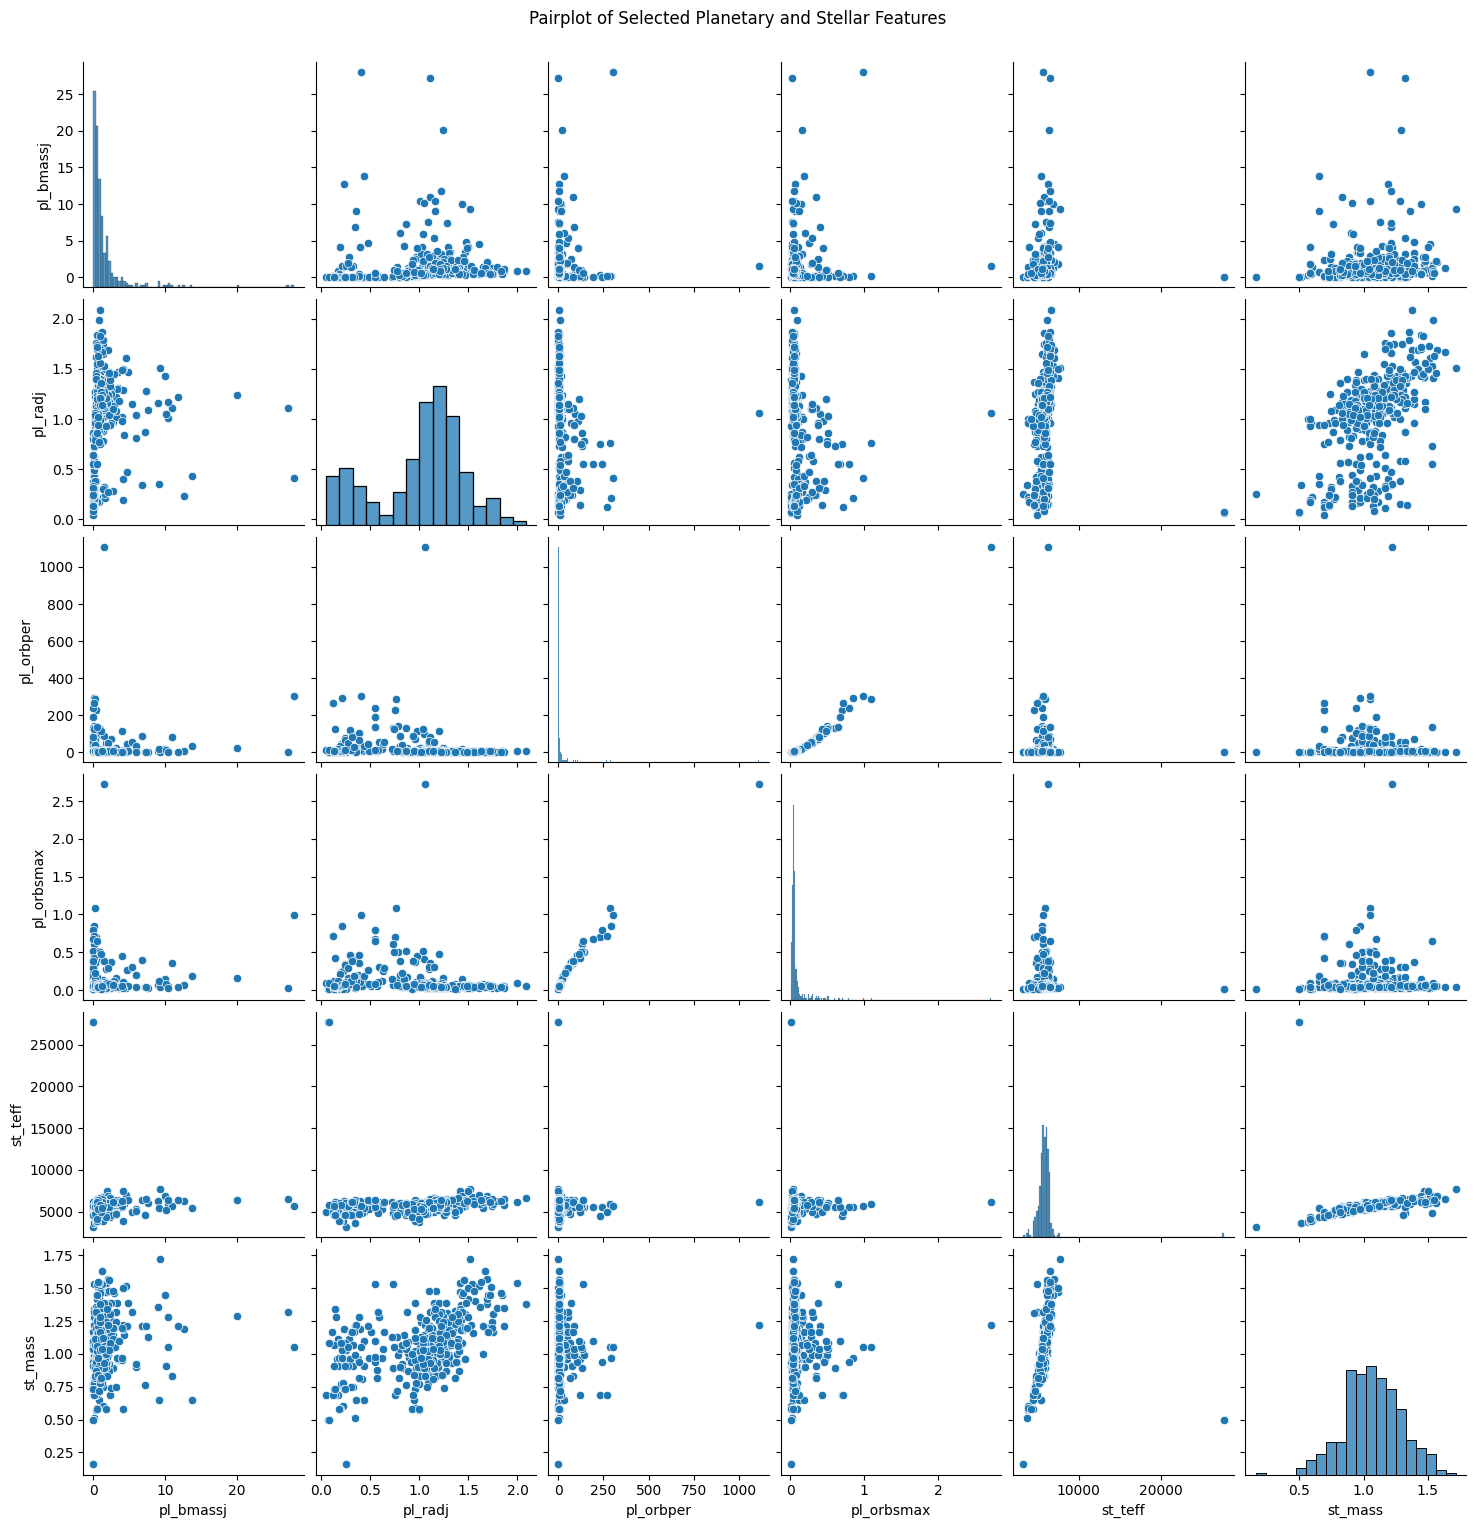

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of columns for the pairplot
features = ['pl_bmassj', 'pl_radj', 'pl_orbper', 'pl_orbsmax', 'st_teff', 'st_mass']

# Drop rows with missing values in these columns
pairplot_data = planets_df[features].dropna()

# Create the pairplot
sns.pairplot(pairplot_data)
plt.suptitle('Pairplot of Selected Planetary and Stellar Features', y=1.02)
plt.show()



In [18]:
# Selecting the target and feature columns
target_column = 'pl_discmethod'
feature_columns = [col for col in planets_df.columns if col != target_column]

# Separating features and target
X = planets_df[feature_columns]
y = planets_df[target_column]

# Identifying numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()


In [19]:
# Defining preprocessing steps
planet_numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

planet_categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



In [20]:
# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', planet_numerical_transformer, numerical_cols),
        ('cat', planet_categorical_transformer, categorical_cols)
    ])


In [21]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying preprocessing
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_transformed.toarray(), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_transformed.toarray(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)


In [22]:
# Create data loaders
planet_train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
planet_test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32, shuffle=False)


In [23]:
# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [24]:
class FCNN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=128, dropout_rate=0.2):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


In [25]:
# RNN Model
class RNN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=128, num_layers=2, dropout_rate=0.2):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_rate)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x, _ = self.rnn(x)
        x = x[:, -1, :]  # Take the output of the last time step
        x = self.fc(x)
        return x

In [26]:
# Training and evaluation function
def train_and_evaluate_fun(model, planet_train_loader, planet_test_loader, criterion, optimizer, device):
    model.to(device)
    num_epochs = 20
    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for X_batch, y_batch in planet_train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(X_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * X_batch.size(0)

        epoch_loss = running_loss / len(planet_train_loader.dataset)
        train_losses.append(epoch_loss)

        model.eval()
        running_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in planet_test_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                output = model(X_batch)
                loss = criterion(output, y_batch)
                running_loss += loss.item() * X_batch.size(0)

        epoch_loss = running_loss / len(planet_test_loader.dataset)
        test_losses.append(epoch_loss)

    plt.figure(figsize=(10, 6))
    plt.plot(range(num_epochs), train_losses, label='Train Loss')
    plt.plot(range(num_epochs), test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in planet_test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            output = model(X_batch)
            _, preds = torch.max(output, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    cm = confusion_matrix(all_labels, all_preds)
    report_dict = classification_report(all_labels, all_preds, output_dict=True, zero_division=0)
    return accuracy, cm, report_dict

In [27]:
# Plot confusion matrix
def planet_plot_confusion_matrix(cm, classes, model_name):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()


In [28]:
def planet_plot_roc_curve(model, planet_test_loader, device):
    model.to(device)
    y_true = []
    y_scores = []

    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in planet_test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            output = model(X_batch)
            y_true.extend(y_batch.cpu().numpy())
            y_scores.extend(output.softmax(dim=1).cpu().numpy())

    y_true = np.array(y_true)
    y_scores = np.array(y_scores)

    # Binarize the output for multiclass ROC
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import roc_curve, auc

    y_true_bin = label_binarize(y_true, classes=np.arange(len(label_encoder.classes_)))

    plt.figure(figsize=(10, 6))
    for i in range(y_scores.shape[1]):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (area = %0.2f)' % roc_auc)

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (Multiclass)')
    plt.legend(loc='lower right')
    plt.show()


In [29]:
# Plot hyperparameter tuning results
def planet_plot_hyperparameter_tuning_results(results):
    df = pd.DataFrame(results)
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='Configuration', y='Accuracy', marker='o')
    plt.xlabel('Configuration')
    plt.ylabel('Accuracy')
    plt.title('Hyperparameter Tuning Results')
    plt.xticks(rotation=90)
    plt.show()


In [30]:
# Hyperparameter tuning for FCNN
def planet_hyperparameter_tuning_fcnn():
    best_accuracy = 0
    best_params = {}
    results = []
    for lr in [0.001, 0.0001, 0.00001]:
        for dropout_rate in [0.2, 0.3, 0.4]:
            model = FCNN(input_dim=X_train_tensor.shape[1], output_dim=len(label_encoder.classes_), hidden_dim=128, dropout_rate=dropout_rate)
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)
            accuracy, cm, report_dict = train_and_evaluate_fun(model, planet_train_loader, planet_test_loader, criterion, optimizer, device)

            results.append({
                'Configuration': f'LR={lr}, Dropout={dropout_rate}',
                'Accuracy': accuracy
            })

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'Learning Rate': lr, 'Dropout Rate': dropout_rate}

    planet_plot_hyperparameter_tuning_results(results)
    return best_params

In [31]:
# Train and evaluate FCNN
fcnn_model = FCNN(input_dim=X_train_tensor.shape[1], output_dim=len(label_encoder.classes_), hidden_dim=128, dropout_rate=0.2)
fcnn_criterion = nn.CrossEntropyLoss()
fcnn_optimizer = optim.Adam(fcnn_model.parameters(), lr=0.001)



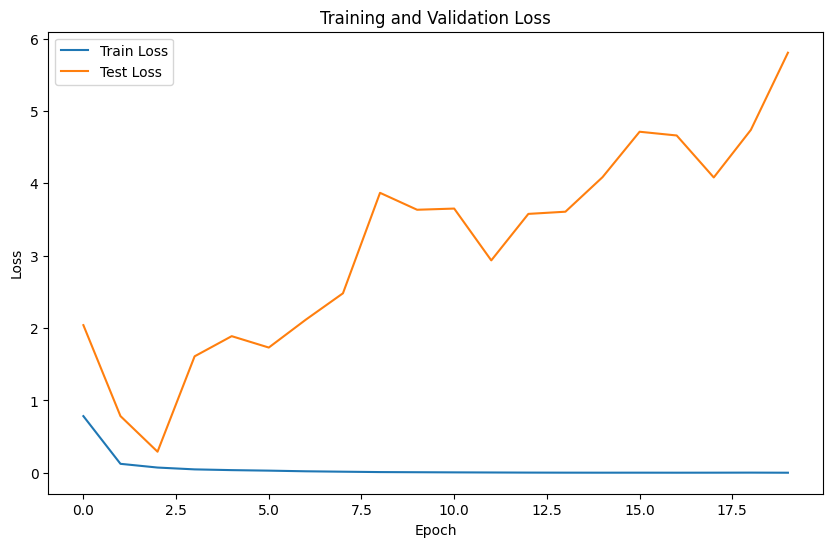

FCNN Accuracy: 0.9822
FCNN Classification Report:
{'1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, '2': {'precision': 0.8333333333333334, 'recall': 0.625, 'f1-score': 0.7142857142857143, 'support': 8.0}, '3': {'precision': 0.875, 'recall': 0.875, 'f1-score': 0.875, 'support': 8.0}, '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, '7': {'precision': 0.9624060150375939, 'recall': 0.9696969696969697, 'f1-score': 0.9660377358490566, 'support': 132.0}, '8': {'precision': 0.9942748091603053, 'recall': 0.9980842911877394, 'f1-score': 0.9961759082217974, 'support': 522.0}, '9': {'precision': 0.5, 'recall': 1.0, 'f1-score': 0.6666666666666666, 'support': 1.0}, 'accuracy': 0.9822222222222222, 'macro avg': {'precision': 0.7378591653616047, 'recall': 0.7811116086978156, 'f1-score': 0.7454522892890336, 'support': 675.0}, 'weighted avg': {'precision': 0.979578831160457, 'recall': 0.9822222222222222, 'f1-score': 0.9805951964515646, 'support': 675.0}}


In [32]:
# Evaluate FCNN
accuracy, fcnn_cm, fcnn_report_dict = train_and_evaluate_fun(fcnn_model, planet_train_loader, planet_test_loader, fcnn_criterion, fcnn_optimizer, device)
print(f"FCNN Accuracy: {accuracy:.4f}")
print(f"FCNN Classification Report:\n{fcnn_report_dict}")


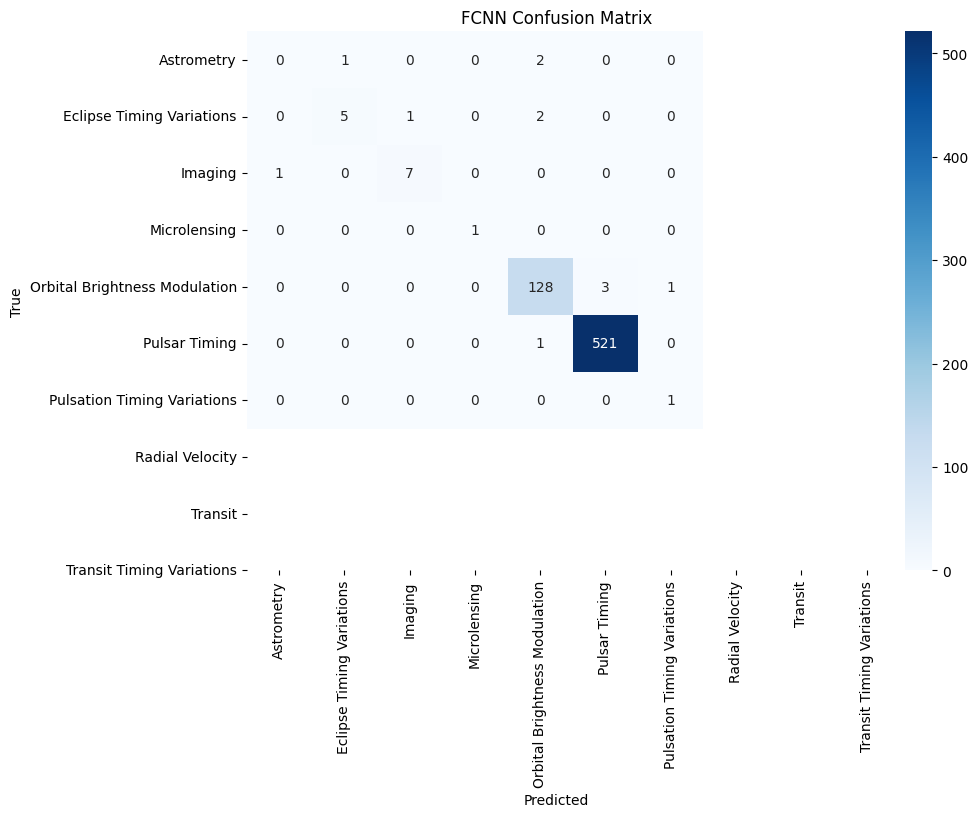

In [33]:
planet_plot_confusion_matrix(fcnn_cm, label_encoder.classes_, 'FCNN')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


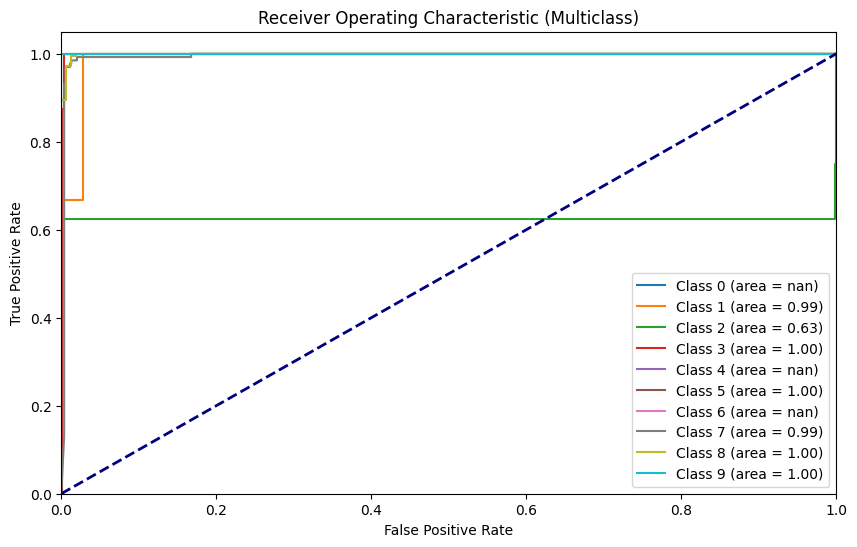

In [34]:
planet_plot_roc_curve(fcnn_model, planet_test_loader, device)


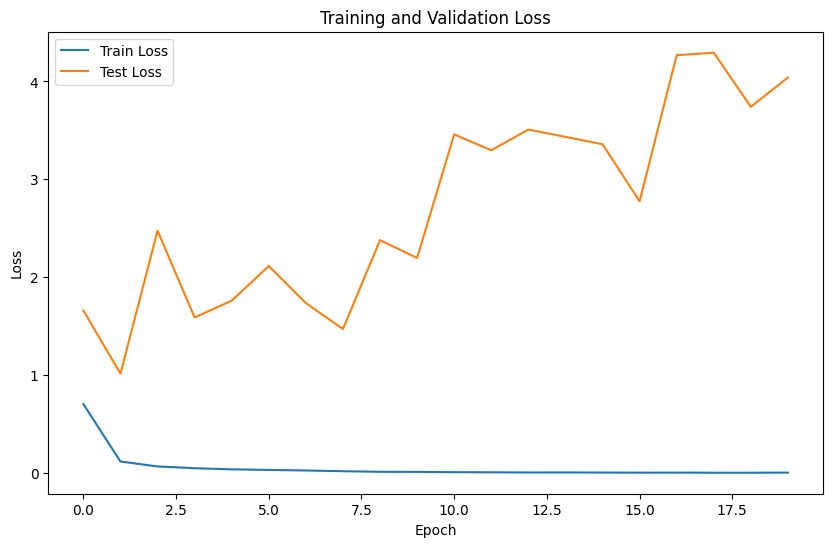

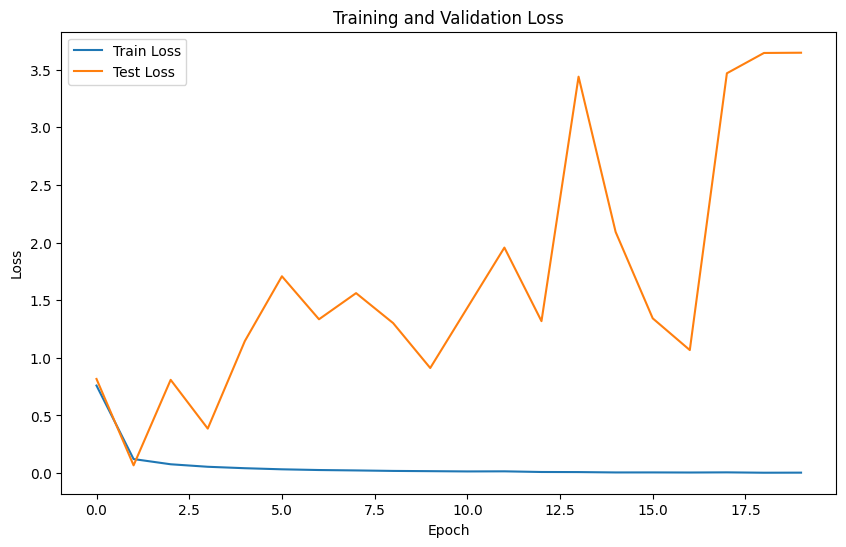

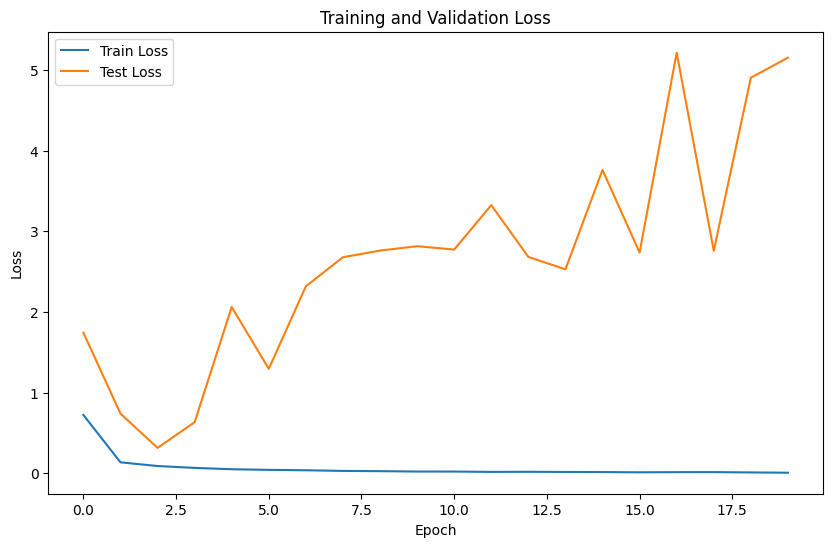

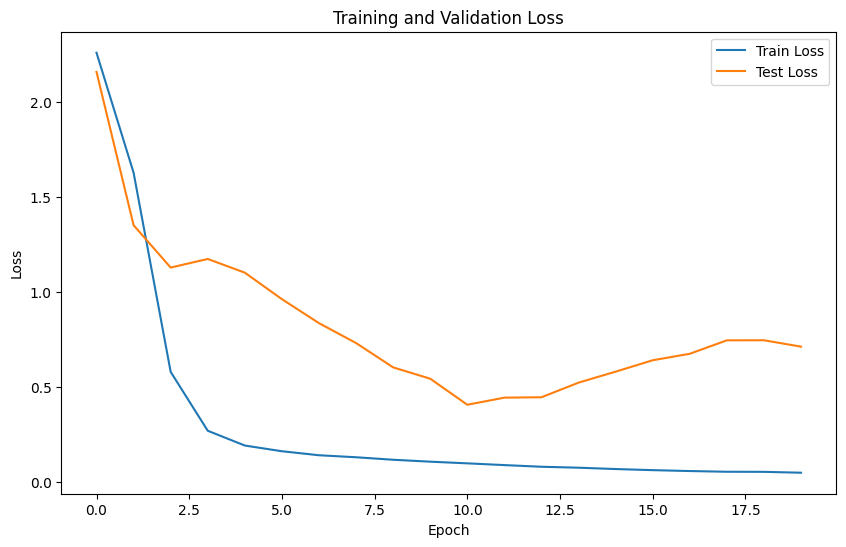

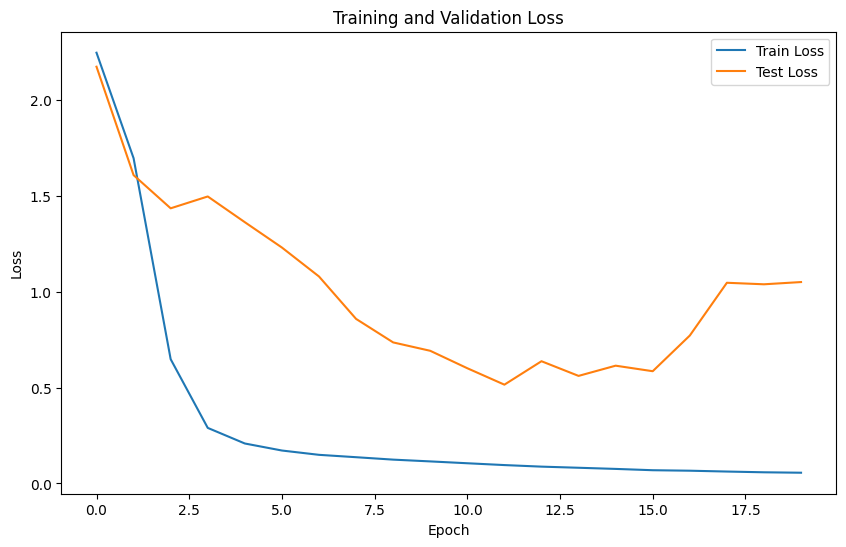

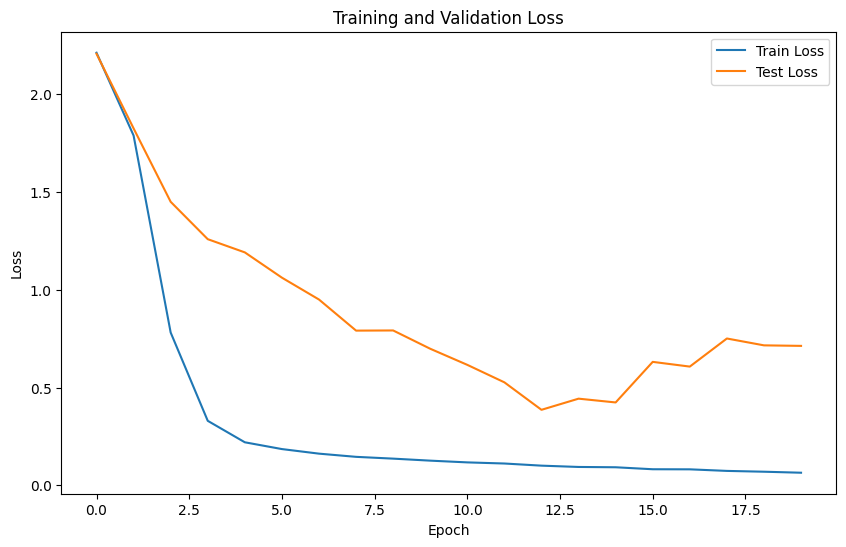

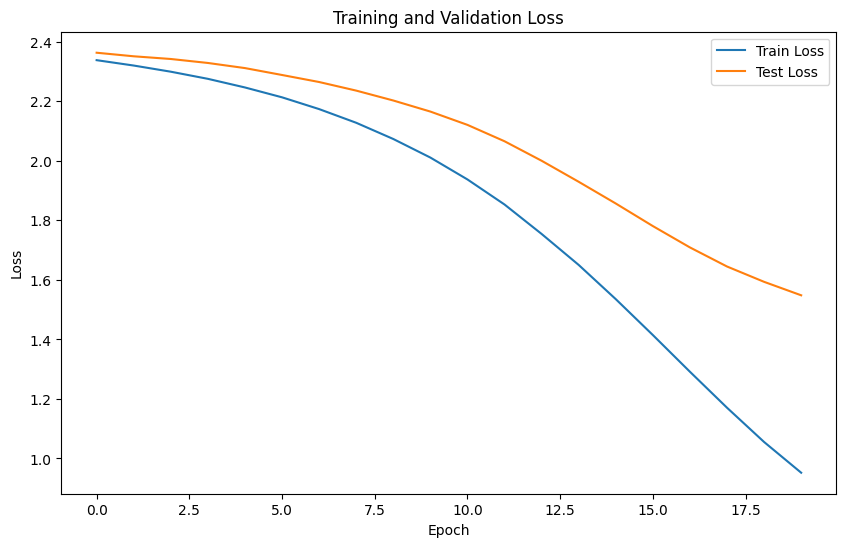

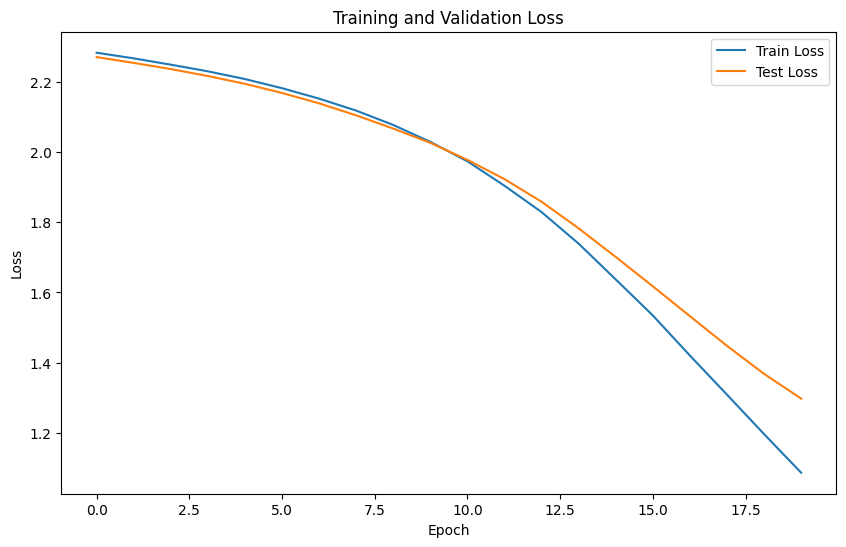

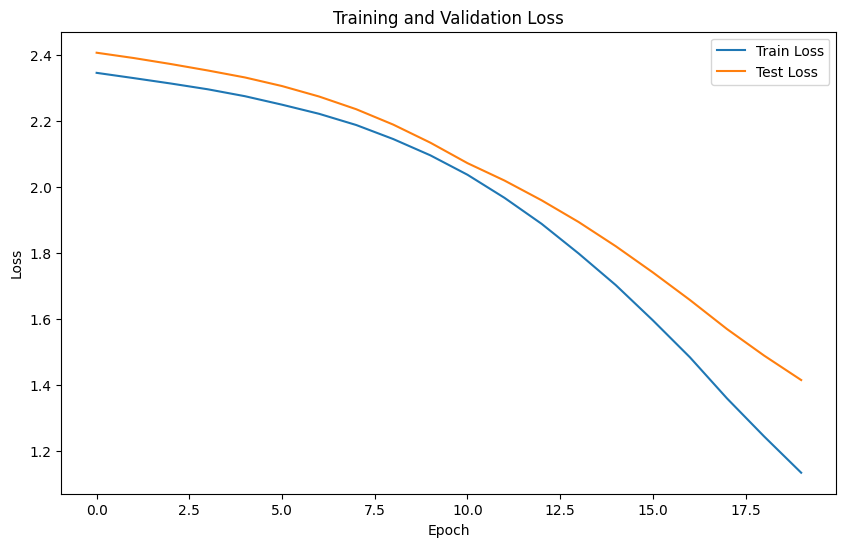

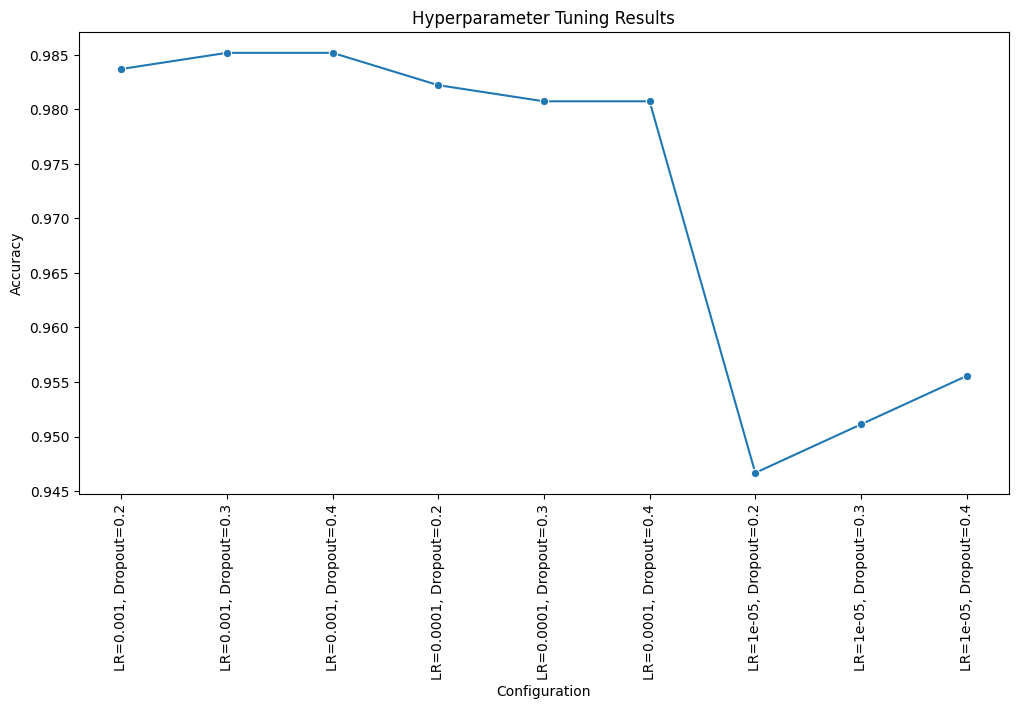

Best Hyperparameters for FCNN: {'Learning Rate': 0.001, 'Dropout Rate': 0.3}


In [35]:
# Hyperparameter tuning for FCNN
best_params = planet_hyperparameter_tuning_fcnn()
print(f"Best Hyperparameters for FCNN: {best_params}")

In [36]:
# Define RNN model
class RNN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=128, num_layers=2, dropout_rate=0.2):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_rate)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Ensure x has shape (batch_size, seq_len, input_dim)
        if x.dim() == 2:
            x = x.unsqueeze(1)  # Add sequence dimension

        x, _ = self.rnn(x)
        x = x[:, -1, :]  # Take the output of the last time step
        x = self.fc(x)
        return x




In [37]:
# Train and evaluate RNN
rnn_model = RNN(input_dim=X_train_tensor.shape[1], output_dim=len(label_encoder.classes_), hidden_dim=128, num_layers=2, dropout_rate=0.2)
rnn_criterion = nn.CrossEntropyLoss()
rnn_optimizer = optim.Adam(rnn_model.parameters(), lr=0.001)


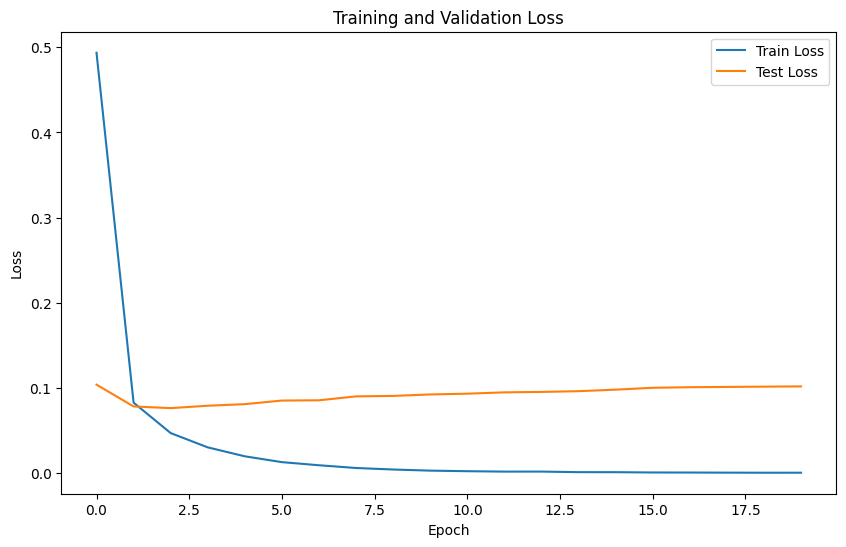

RNN Accuracy score: 0.9837
RNN Classification Report:
{'1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, '2': {'precision': 1.0, 'recall': 0.625, 'f1-score': 0.7692307692307693, 'support': 8.0}, '3': {'precision': 1.0, 'recall': 0.875, 'f1-score': 0.9333333333333333, 'support': 8.0}, '5': {'precision': 0.5, 'recall': 1.0, 'f1-score': 0.6666666666666666, 'support': 1.0}, '7': {'precision': 0.9485294117647058, 'recall': 0.9772727272727273, 'f1-score': 0.9626865671641791, 'support': 132.0}, '8': {'precision': 0.9942748091603053, 'recall': 0.9980842911877394, 'f1-score': 0.9961759082217974, 'support': 522.0}, '9': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0}, 'accuracy': 0.9837037037037037, 'macro avg': {'precision': 0.7775434601321444, 'recall': 0.7821938597800667, 'f1-score': 0.7611561778023922, 'support': 675.0}, 'weighted avg': {'precision': 0.9803219744216602, 'recall': 0.9837037037037037, 'f1-score': 0.9812824154735251, 'support': 675.0}}


In [38]:
# Evaluate RNN
accuracy, rnn_cm, rnn_report_dict = train_and_evaluate_fun(rnn_model, planet_train_loader, planet_test_loader, rnn_criterion, rnn_optimizer, device)
print(f"RNN Accuracy score: {accuracy:.4f}")
print(f"RNN Classification Report:\n{rnn_report_dict}")


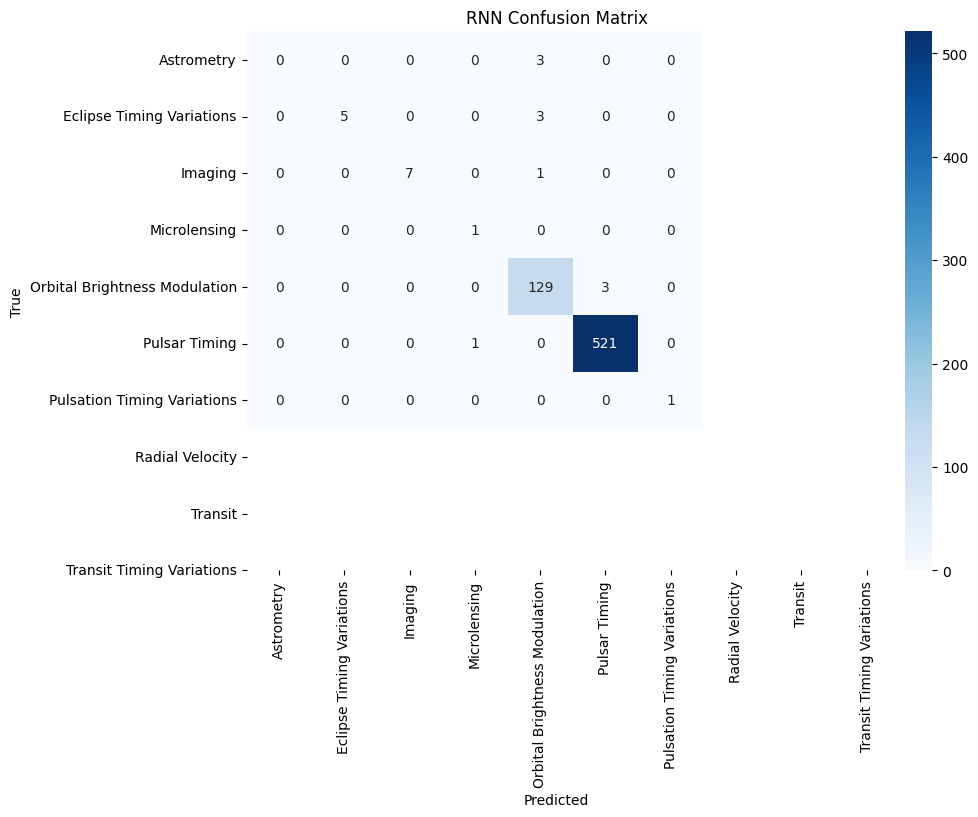

In [39]:
planet_plot_confusion_matrix(rnn_cm, label_encoder.classes_, 'RNN')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


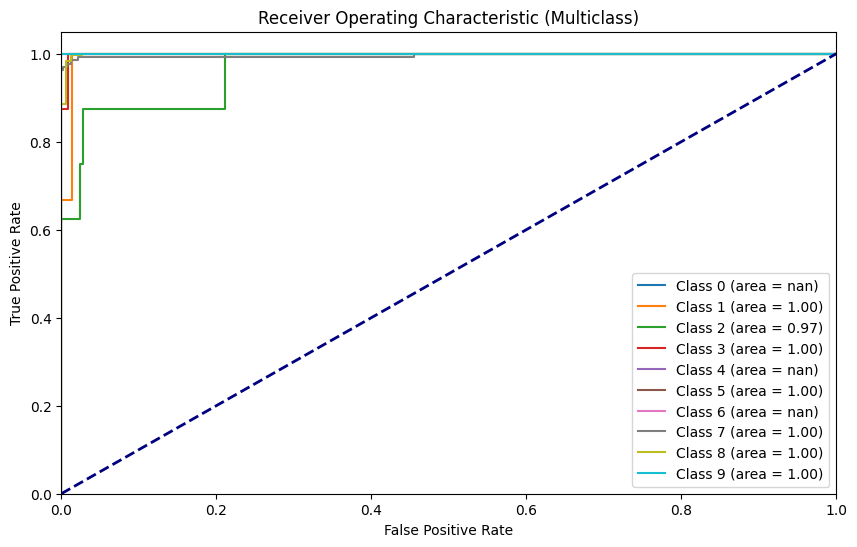

In [40]:
planet_plot_roc_curve(rnn_model, planet_test_loader, device)

In [41]:
from itertools import product

def planet_hyperparameter_tuning_rnn():
    best_accuracy = 0
    best_params = {}
    results = []

    # Define the reduced hyperparameter grid
    learning_rates = [0.001, 0.0001]
    dropout_rates = [0.2, 0.3]
    hidden_dims = [64, 128]
    num_layers_options = [1, 2]

    for lr, dropout_rate, hidden_dim, num_layers in product(learning_rates, dropout_rates, hidden_dims, num_layers_options):
        print(f"Testing configuration: LR={lr}, Dropout={dropout_rate}, Hidden Dim={hidden_dim}, Num Layers={num_layers}")

        # Initialize the RNN model with current hyperparameters
        model = RNN(input_dim=X_train_tensor.shape[1], output_dim=len(label_encoder.classes_), hidden_dim=hidden_dim, num_layers=num_layers, dropout_rate=dropout_rate)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)

        # Train and evaluate the model
        accuracy, cm, report_dict = train_and_evaluate_fun(model, planet_train_loader, planet_test_loader, criterion, optimizer, device)

        # Record the results
        results.append({
            'Configuration': f'LR={lr}, Dropout={dropout_rate}, Hidden Dim={hidden_dim}, Num Layers={num_layers}',
            'Accuracy': accuracy
        })

        # Update the best parameters if current configuration is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'Learning Rate': lr, 'Dropout Rate': dropout_rate, 'Hidden Dim': hidden_dim, 'Num Layers': num_layers}

    # Plot hyperparameter tuning results
    planet_plot_hyperparameter_tuning_results(results)
    return best_params








Testing configuration: LR=0.001, Dropout=0.2, Hidden Dim=64, Num Layers=1


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


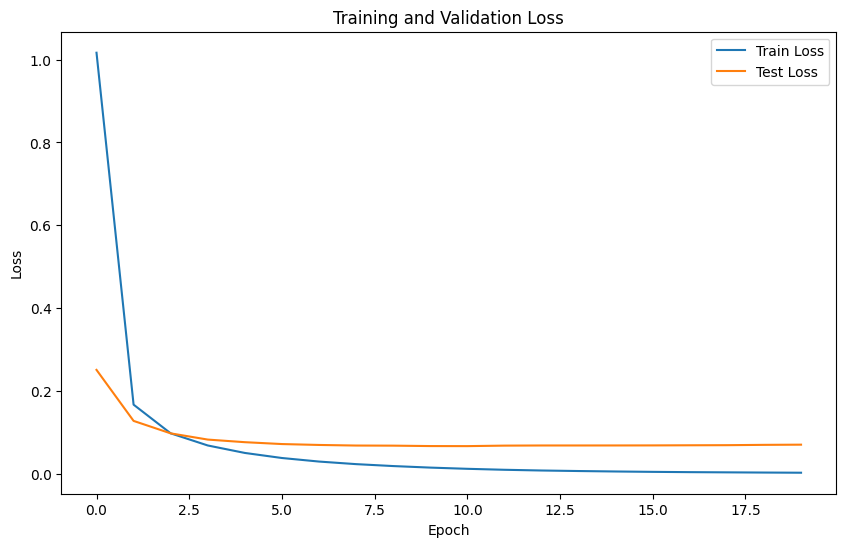

Testing configuration: LR=0.001, Dropout=0.2, Hidden Dim=64, Num Layers=2


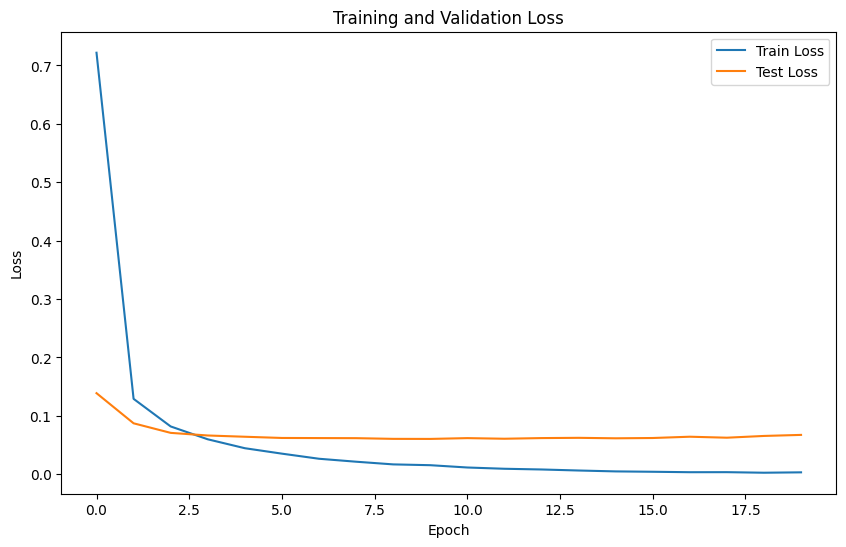

Testing configuration: LR=0.001, Dropout=0.2, Hidden Dim=128, Num Layers=1


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


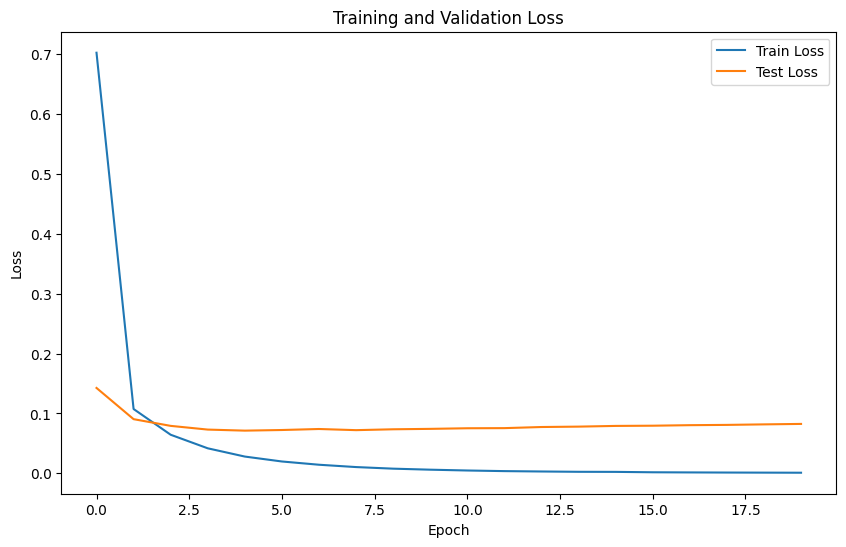

Testing configuration: LR=0.001, Dropout=0.2, Hidden Dim=128, Num Layers=2


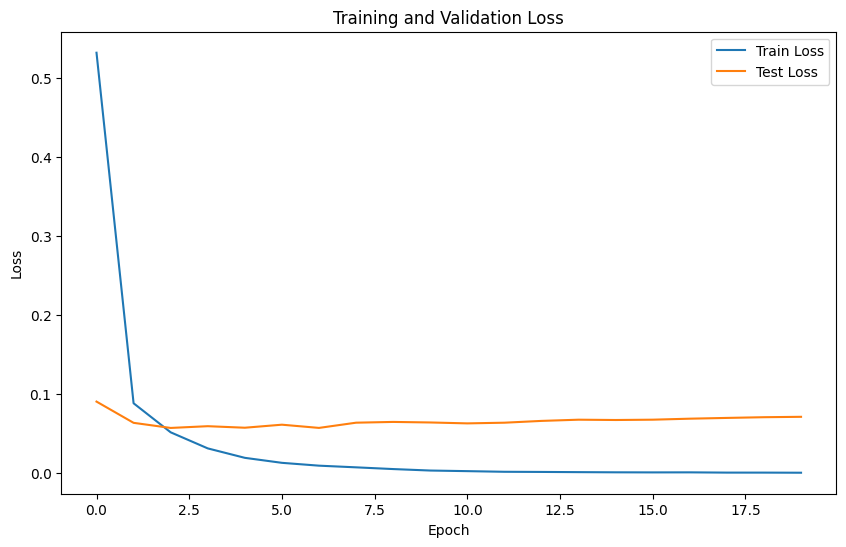

Testing configuration: LR=0.001, Dropout=0.3, Hidden Dim=64, Num Layers=1


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


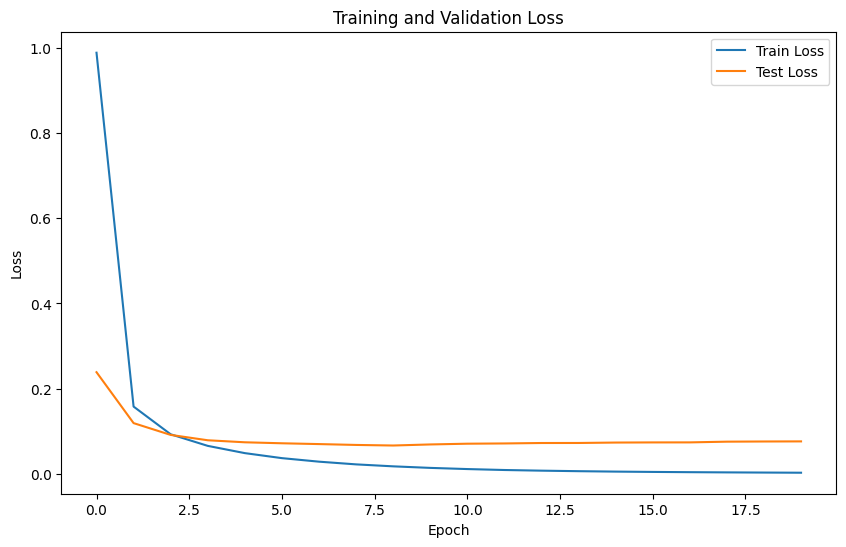

Testing configuration: LR=0.001, Dropout=0.3, Hidden Dim=64, Num Layers=2


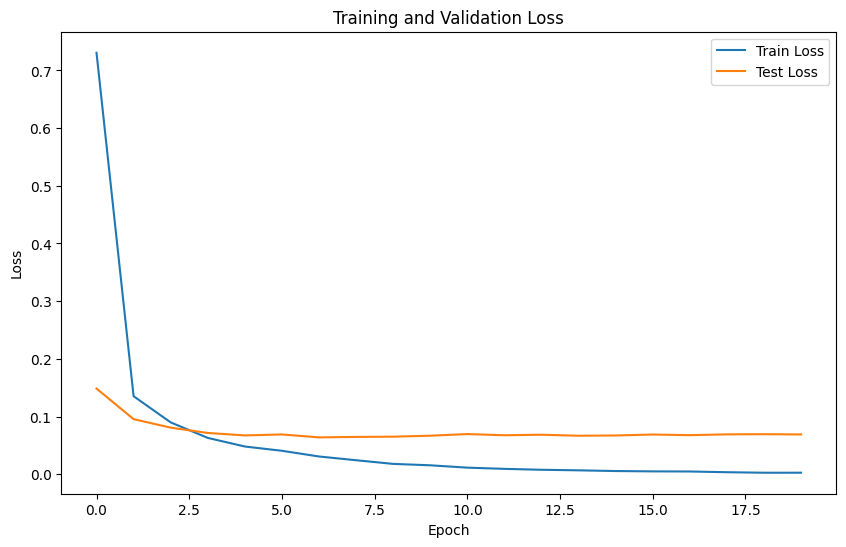

Testing configuration: LR=0.001, Dropout=0.3, Hidden Dim=128, Num Layers=1


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


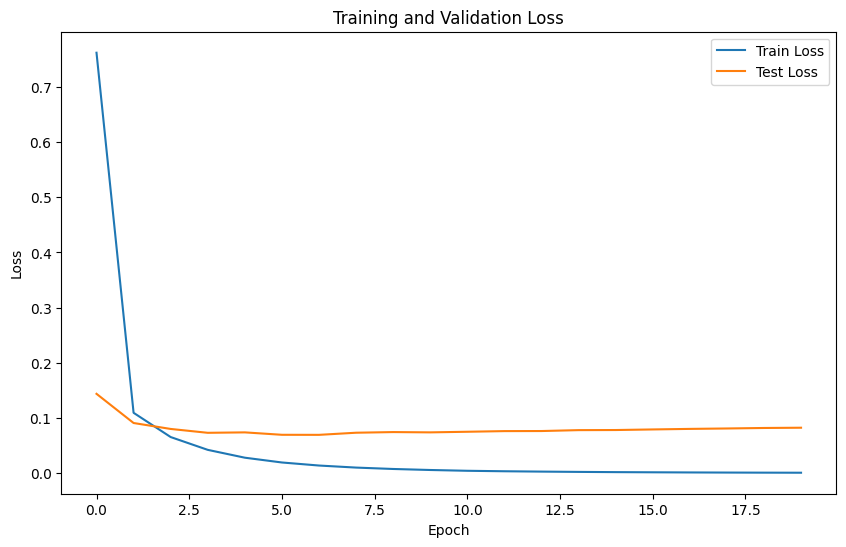

Testing configuration: LR=0.001, Dropout=0.3, Hidden Dim=128, Num Layers=2


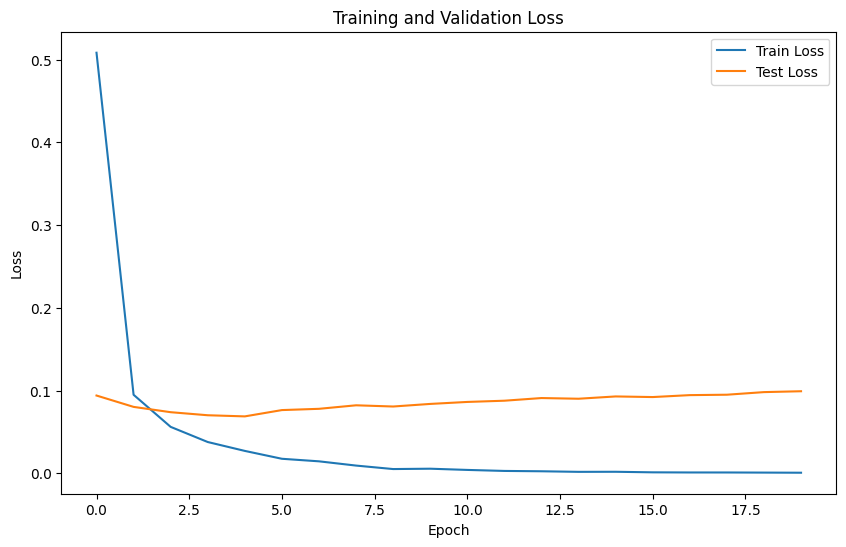

Testing configuration: LR=0.0001, Dropout=0.2, Hidden Dim=64, Num Layers=1


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


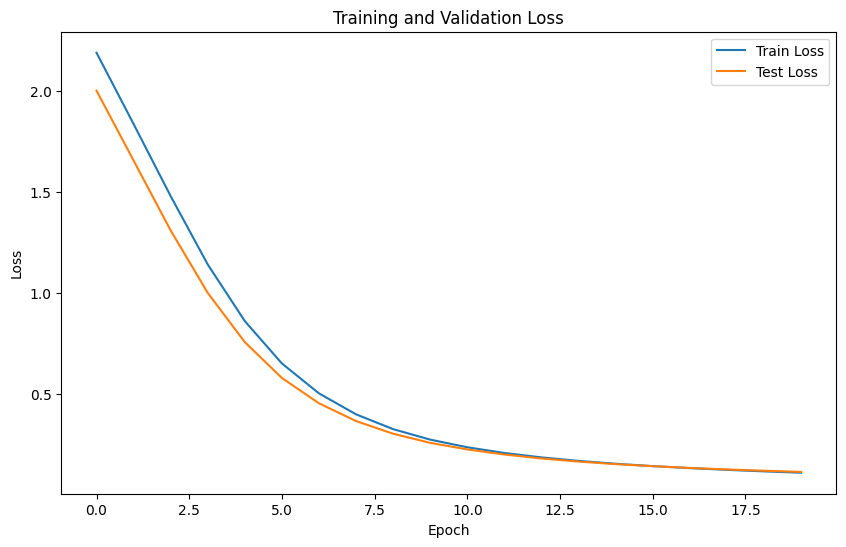

Testing configuration: LR=0.0001, Dropout=0.2, Hidden Dim=64, Num Layers=2


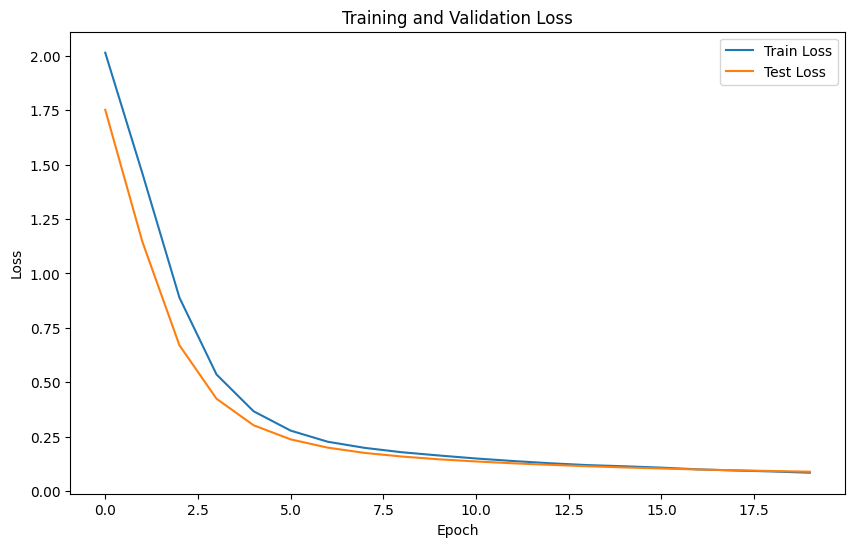

Testing configuration: LR=0.0001, Dropout=0.2, Hidden Dim=128, Num Layers=1


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


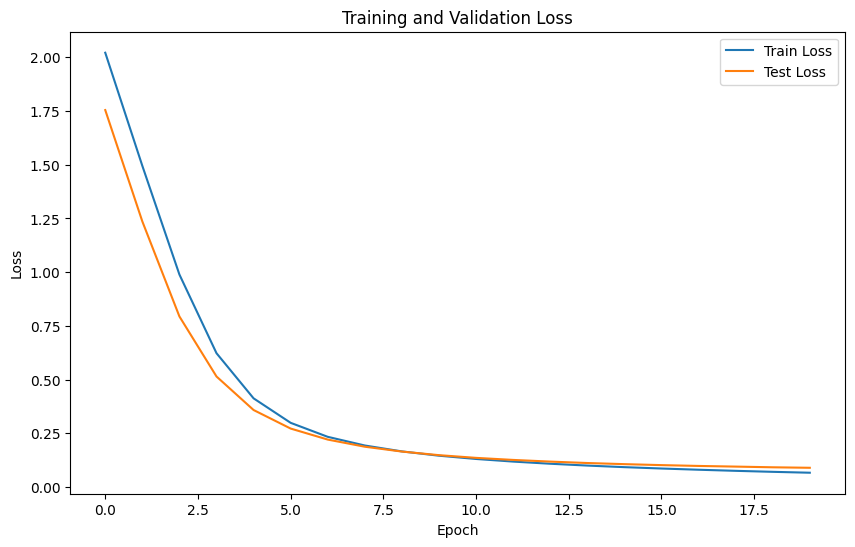

Testing configuration: LR=0.0001, Dropout=0.2, Hidden Dim=128, Num Layers=2


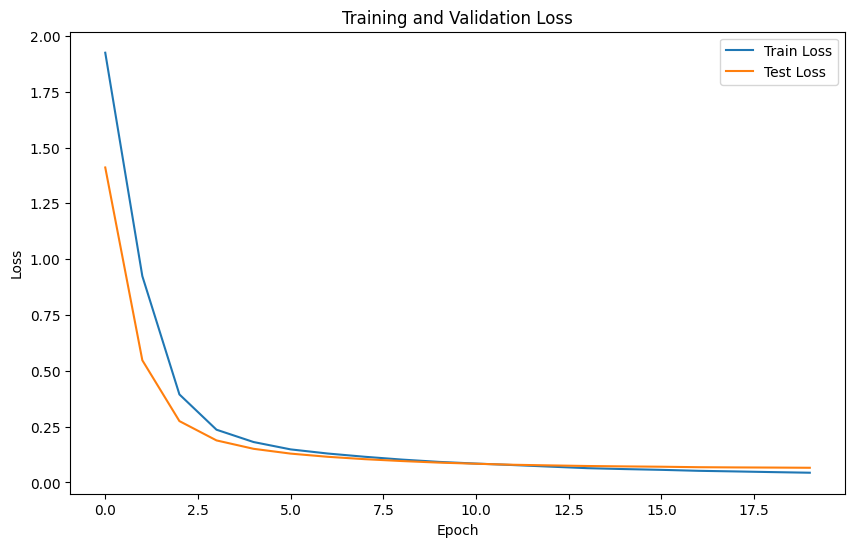

Testing configuration: LR=0.0001, Dropout=0.3, Hidden Dim=64, Num Layers=1


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


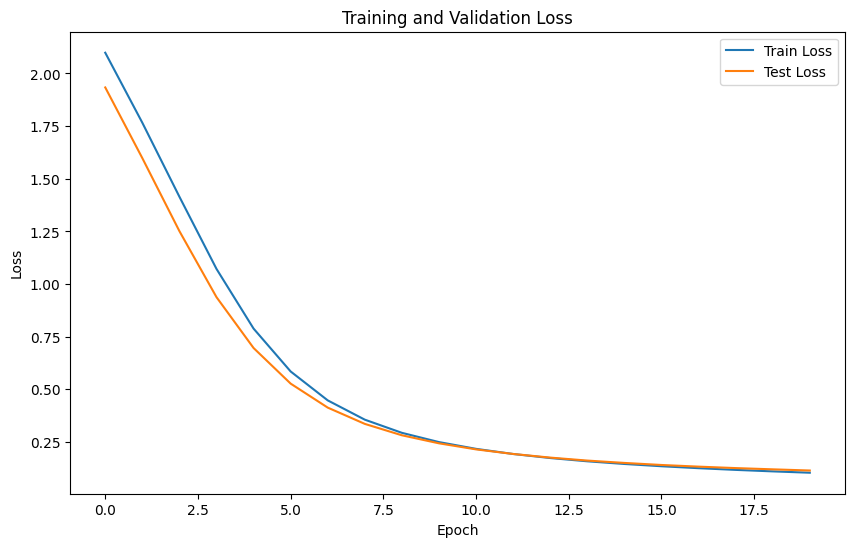

Testing configuration: LR=0.0001, Dropout=0.3, Hidden Dim=64, Num Layers=2


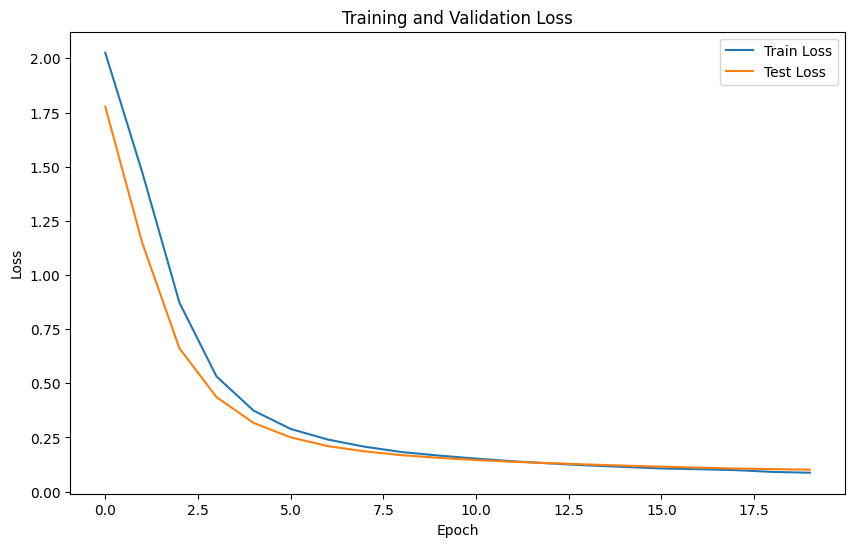

Testing configuration: LR=0.0001, Dropout=0.3, Hidden Dim=128, Num Layers=1


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


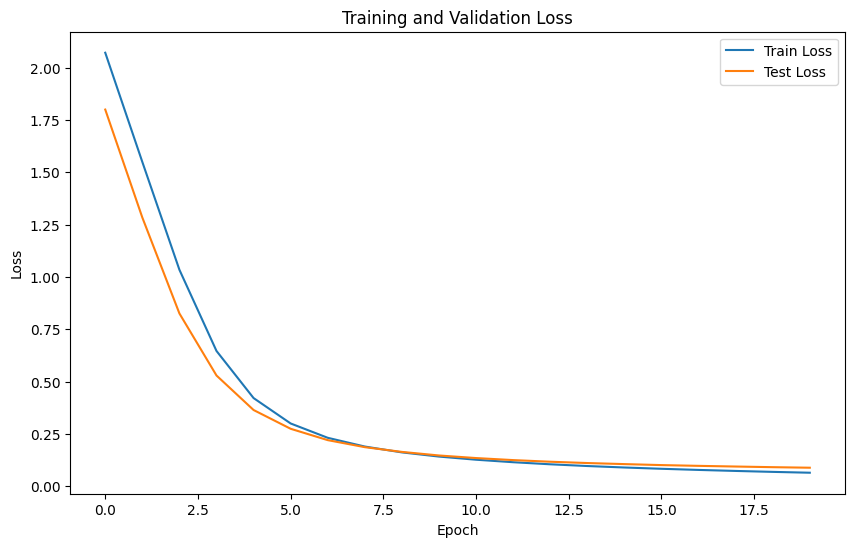

Testing configuration: LR=0.0001, Dropout=0.3, Hidden Dim=128, Num Layers=2


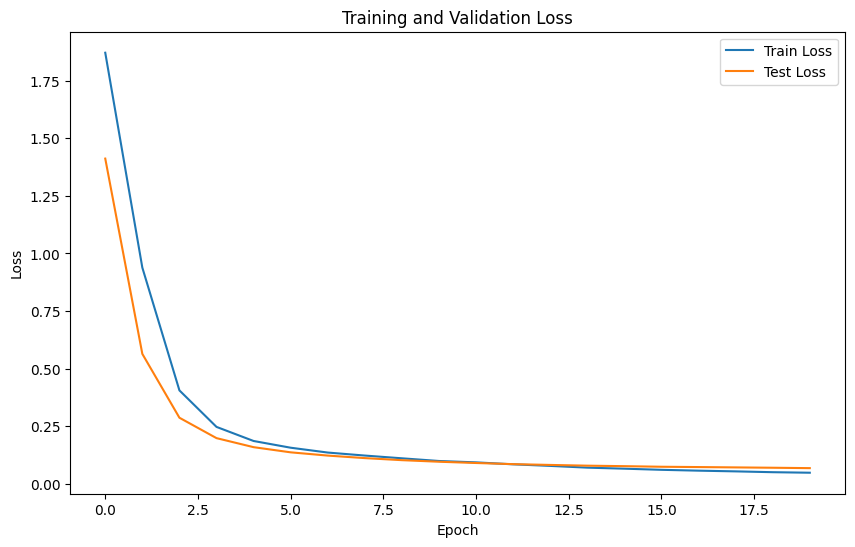

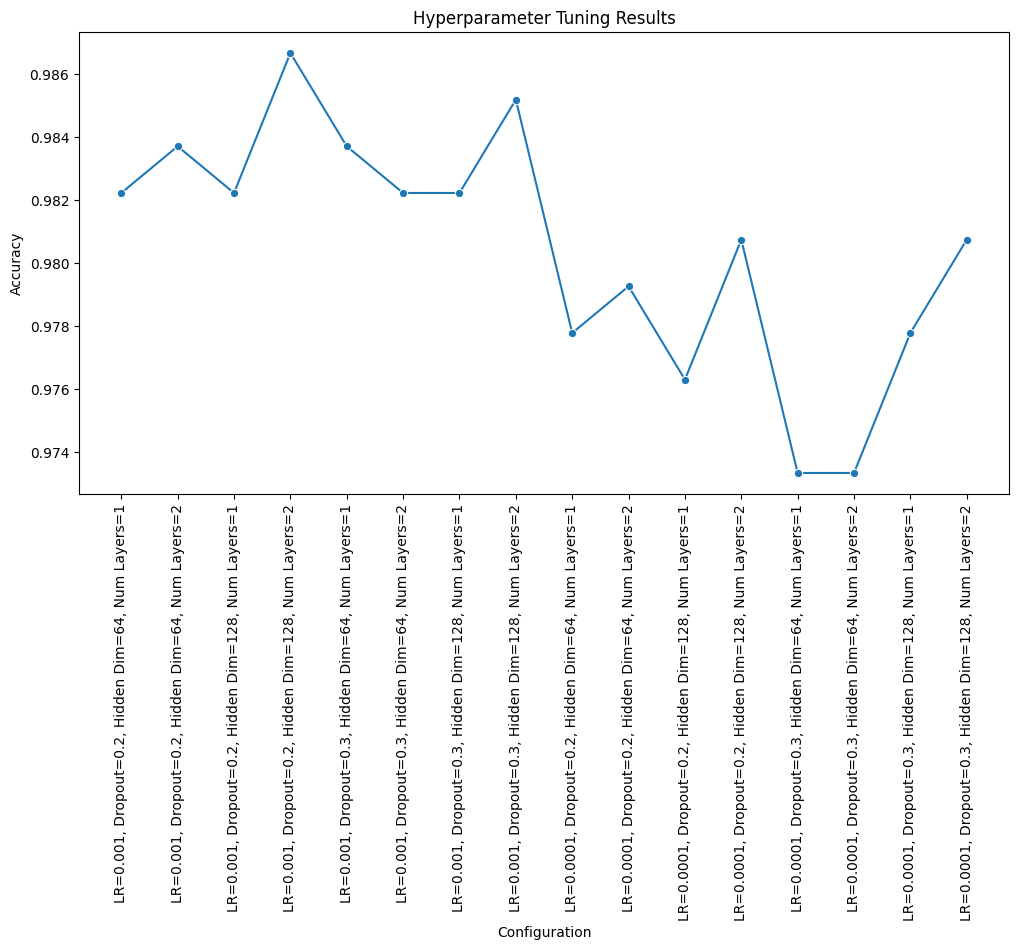

Best Hyperparameters for RNN model: {'Learning Rate': 0.001, 'Dropout Rate': 0.2, 'Hidden Dim': 128, 'Num Layers': 2}


In [42]:
# Perform hyperparameter tuning for RNN
best_rnn_params = planet_hyperparameter_tuning_rnn()
print(f"Best Hyperparameters for RNN model: {best_rnn_params}")